# Union-Find Data Structure

The Union-Find Data Structure, or Disjoint Set Union (DSU), efficiently manages and merges disjoint sets. It supports two main operations: `find` (to determine a set’s root) and `union` (to merge sets).

#### `class UnionFind`

1. **Initialization**:
   - The `UnionFind` class initializes with a set of vertices. Each vertex starts as its own parent, so initially, each vertex is its own set.

2. **Find Operation**:
   - **`find(node)`**: Traverses parent links to find the root of `node`, identifying the set to which the node belongs.

3. **Union Operation**:
   - **`union(u, v)`**: Merges sets containing `u` and `v`. If they share the same root, they are already in the same set, so merging is skipped to avoid cycles. Otherwise, the root of one set is updated to the root of the other, merging the sets.

In [4]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {}
    for u in vertices:
      self.parent[u] = u

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if root1 == root2:
      print(f'☠️ union {u}, {v}: {root1=}, {root2=}, cannot merge, because a cycle would be created')
    else:
      self.parent[root2] = root1
      print(f'✅ union {u}, {v}: {root1=}, {root2=}, merged successfully!')

In [5]:
vertices = {'A', 'B', 'C', 'F', 'G', 'H', 'D', 'E'}
uf = UnionFind(vertices)

# component 1
uf.union('A', 'B')
uf.union('B', 'C')

# component 2
uf.union('F', 'G')
uf.union('G', 'H')
uf.union('H', 'D')
uf.union('D', 'E')

# find roots of vertices
print(uf.find('A'))
print(uf.find('C'))
print(uf.find('D'))

# try to merge components
uf.union('E', 'H')  # cannot merge, already in the same component
uf.union('D', 'C')  # successfully merges components

✅ union A, B: root1='A', root2='B', merged successfully!
✅ union B, C: root1='A', root2='C', merged successfully!
✅ union F, G: root1='F', root2='G', merged successfully!
✅ union G, H: root1='F', root2='H', merged successfully!
✅ union H, D: root1='F', root2='D', merged successfully!
✅ union D, E: root1='F', root2='E', merged successfully!
A
A
F
☠️ union E, H: root1='F', root2='F', cannot merge, because a cycle would be created
✅ union D, C: root1='F', root2='A', merged successfully!


# Kruskal's algorithm using UnionFind

In [6]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {u: u for u in vertices}

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if root1 != root2:
      self.parent[root2] = root1
      return True
    return False


def kruskal(adjacency_list):
  mst = []

  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))
  edges.sort()  # sort edges by weight

  uf = UnionFind(adjacency_list)

  for weight, u, v in edges:
    if uf.union(u, v):  # if u and v are in different sets
      mst.append((u, v, weight))

  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

True

In [7]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

kruskal(adjacency_list) == [('C', 'E', 1),
                            ('A', 'B', 2),
                            ('A', 'C', 3),
                            ('A', 'D', 3),
                            ('C', 'F', 6),
                            ('F', 'G', 9)]

True

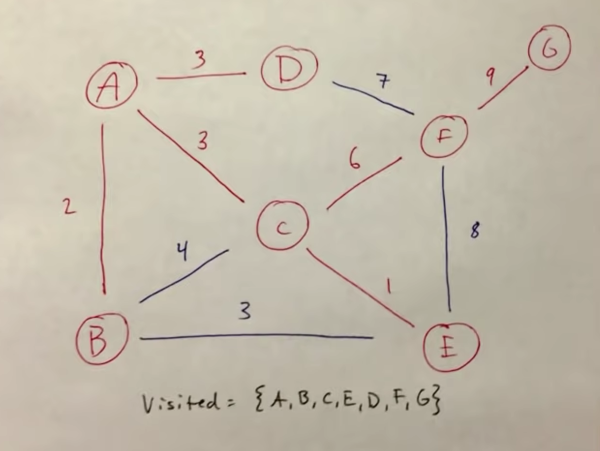

**Kruskal's Algorithm (selecting all the edges ☠️)**

https://gifyard.com/free-gif-player/

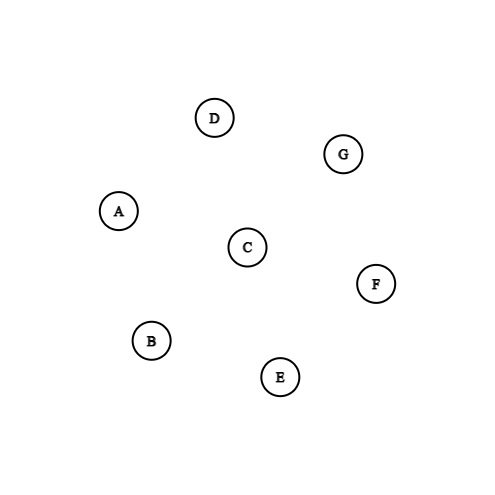

**Kruskal's Algorithm (selecting edges if they connect different components ✅)**

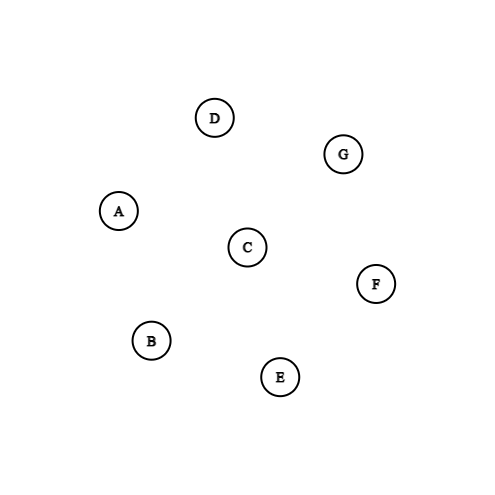

**Union-Find (components after every merge 😱)**

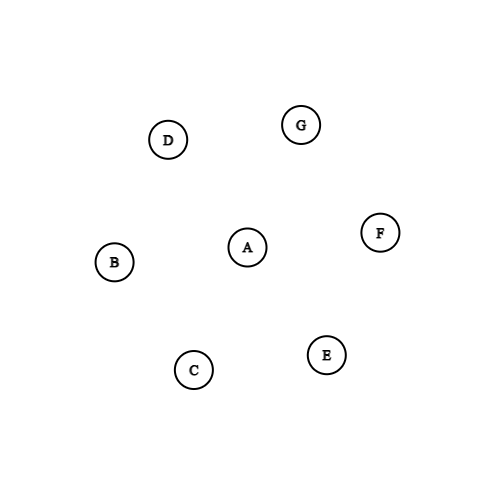

**Kruskal's Algorithm & Union-Find (working in sync)**

https://www.canva.com/design/DAGLeGr1JZY/tStCz0s6qYJkaCNdmpf0pw/view?utm_content=DAGLeGr1JZY&utm_campaign=designshare&utm_medium=link&utm_source=editor

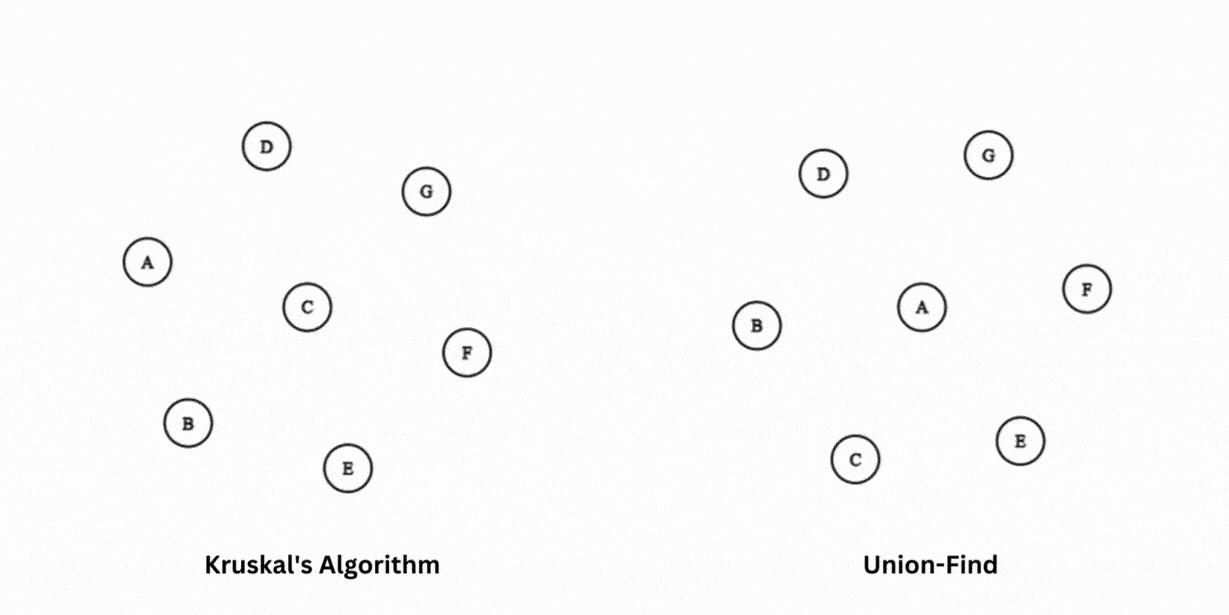

### Binary Tree (BT) ☢️
- Tree structure
- Each node: max 2 children

### Full (Strict) Binary Tree
- Special BT
- Each node: exactly 2 or 0 children

### Almost Complete Binary Tree (ACBT)
- BT filled top to bottom
- Fill left to right within levels
- Levels may have holes (not fully filled)

### Complete Binary Tree (CBT)
- Each level fully filled
- Can be full BT without being complete (if a level is not fully filled)

### Binary Search Tree (BST)
- Left child: lower value than parent
- Right child: higher value than parent

### Heap ☢️
- Special ACBT

### Max Heap
- Parent node ≥ children
- Root node: maximum value

### Min Heap
- Parent node ≤ children
- Root node: minimum value

### Representing Trees as Arrays ☢️
- Nodes stored in array $ H $
- Left child of $ H[i] $: $ H[2i + 1] $
- Right child of $ H[i] $: $ H[2i + 2] $
- Parent of $ H[i] $ ($ i > 0 $): $ H\left\lfloor \frac{i - 1}{2} \right\rfloor $

In [8]:
H = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Tree
#         10
#        /  \
#      20    30
#     / \   /  \
#   40  50 60  70
#  / \  /
# 80 90 100

# index of node 30
index_30 = 2

# find indices of left child, right child, and parent
index_left_child = 2 * index_30 + 1
index_right_child = 2 * index_30 + 2
index_parent = (index_30 - 1) // 2

# print values
print(f"Index of node 30: {index_30}, Value: {H[index_30]}")
print(f"Index of left child: {index_left_child}, Value: {H[index_left_child]}")
print(f"Index of right child: {index_right_child}, Value: {H[index_right_child]}")
print(f"Index of parent: {index_parent}, Value: {H[index_parent]}")

Index of node 30: 2, Value: 30
Index of left child: 5, Value: 60
Index of right child: 6, Value: 70
Index of parent: 0, Value: 10


### Heap Construction Methods ☢️

#### 1. One-by-One Method
1. Start with an empty heap.
2. Append an element, check parent-child order (bottom to top).
   - Fix inconsistencies with swaps.
3. Repeat for each element.
4. Complexity: $ O(n \log n) $ (each append: $ \log n $ checks).

#### 2. Heapify Method
1. Append all elements at once.
2. Tree is initially invalid.
3. Fix order from root to leaves (top to bottom).
4. Results in a valid heap. Complexity: $ O(n) $.

# MaxHeap

## `class MaxHeap` ☢️
- **Initialization**: Constructs the heap using either the One-by-One or Heapify method.
- **Insert**: Adds a new value and adjusts the heap property.
- **Delete**: Removes the root and adjusts the heap property.
- **Helper Methods**:
  - `_build_heap_one_by_one`: Inserts elements one by one.
  - `_build_heap_heapify`: Builds heap using heapify.
  - `_heapify_up` and `_heapify_down`: Maintain heap properties.
  - `_swap`: Swaps two elements.
- **print_heap**: Prints the heap in two formats:
  - Comma-separated list.
    - https://treeconverter.com/
  - Space-separated list.
    - https://trees-visualizer.netlify.app/trees

## Walkthrough 🌿

#### Initialization
- Define `MaxHeap` class.
- `__init__(self, H, method='one_by_one')`:
  - Initialize empty heap list.
  - Call `_build_heap_one_by_one(H)` if method is 'one_by_one'.
  - Call `_build_heap_heapify(H)` if method is 'heapify'.
  - Raise error if method is invalid.

#### Insert Method
- `insert(self, value)`:
  - Append value to heap.
  - Call `_heapify_up(last index)`.

#### Delete Method
- `delete(self)`:
  - Return None if heap is empty.
  - Swap root with last element.
  - Remove last element and store it.
  - Call `_heapify_down(0)`.
  - Return stored element (root).

#### One-by-One Build Method
- `_build_heap_one_by_one(self, H)`:
  - For each value in H, call `insert(value)`.

#### Heapify Build Method
- `_build_heap_heapify(self, H)`:
  - Set heap to H.
  - For each index from middle to 0, call `_heapify_down(index)`.

#### Heapify Up Method
- `_heapify_up(self, index)`:
  - Calculate parent index.
  - If index > 0 and heap[index] > heap[parent index]:
    - Swap index and parent index.
    - Call `_heapify_up(parent index)`.

#### Heapify Down Method
- `_heapify_down(self, index)`:
  - Calculate left and right child indices.
  - Set largest to index.
  - If left child exists and heap[left] > heap[largest], set largest to left.
  - If right child exists and heap[right] > heap[largest], set largest to right.
  - If largest is not index:
    - Swap index and largest.
    - Call `_heapify_down(largest)`.

#### Swap Method
- `_swap(self, i, j)`:
  - Swap heap[i] and heap[j].

#### Print Heap Method
- `print_heap(self)`:
  - Print heap as comma-separated list.
  - Print heap as space-separated list.

#### Test
- Create list H with values.
- Construct `MaxHeap` using 'one_by_one' method.
- Print heap.
- Construct `MaxHeap` using 'heapify' method.
- Print heap.

In [9]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise ValueError("Invalid method. Choose 'one_by_one' or 'heapify'.")

  def insert(self, value):
    # add value to the end
    self.heap.append(value)
    # fix heap property (bottom to top)
    self._heapify_up(len(self.heap) - 1)

  def delete(self):
    if not self.heap:
      return None
    # swap root with last element and remove last element
    self._swap(0, len(self.heap) - 1)
    root = self.heap.pop()
    # fix heap property (top to bottom)
    self._heapify_down(0)
    return root

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    # build heap property (top to bottom)
    for i in range(len(H) // 2 - 1, -1, -1):
      self._heapify_down(i)

  def _heapify_up(self, index):
    parent_index = (index - 1) // 2
    if index > 0 and self.heap[index] > self.heap[parent_index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    largest = index
    left = 2 * index + 1
    right = 2 * index + 2
    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right
    if largest != index:
      self._swap(index, largest)
      self._heapify_down(largest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def print_heap(self):
    # print heap in list format
    print(", ".join(map(str, self.heap)))
    # print heap in space-separated format
    print(" ".join(map(str, self.heap)))


# test
H = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# construct heap using one-by-one method
max_heap = MaxHeap(H, method='one_by_one')
print("Heap (One-by-One):")
max_heap.print_heap()

# construct heap using heapify method
max_heap = MaxHeap(H, method='heapify')
print("Heap (Heapify):")
max_heap.print_heap()

Heap (One-by-One):
100, 90, 60, 70, 80, 20, 50, 10, 40, 30
100 90 60 70 80 20 50 10 40 30
Heap (Heapify):
100, 90, 70, 80, 50, 60, 30, 10, 40, 20
100 90 70 80 50 60 30 10 40 20


**Heap (One-by-One):**
  - **100, 90, 60, 70, 80, 20, 50, 10, 40, 30**

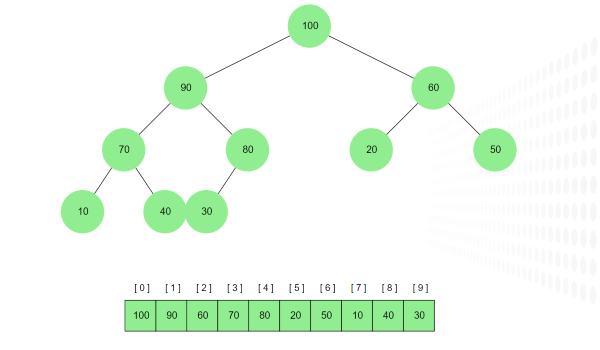

**Heap (Heapify):**
  - **100, 90, 70, 80, 50, 60, 30, 10, 40, 20**

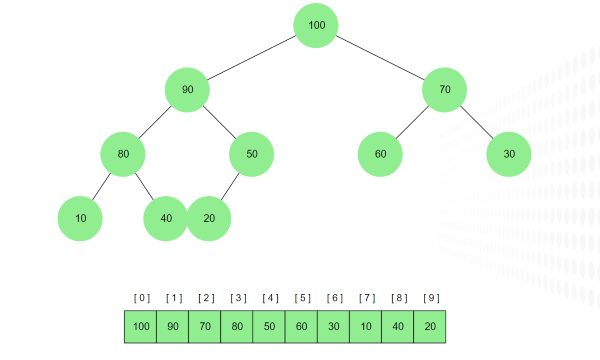

# MinHeap Walkthrough 🌿

#### Same Methods as MaxHeap
- Initialization
  - `__init__(self, H, method='one_by_one')`
- Insert Method
  - `insert(self, value)`
- Delete Method
  - `delete(self)`
- One-by-One Build Method
  - `_build_heap_one_by_one(self, H)`
- Heapify Build Method
  - `_build_heap_heapify(self, H)`
- Swap Method
  - `_swap(self, i, j)`
- Print Heap Method
  - `print_heap(self)`

#### Different Methods for MinHeap

##### Heapify Up Method
- `_heapify_up(self, index)`:
  - Calculate parent index.
  - If index > 0 and heap[index] < heap[parent index]:
    - Swap index and parent index.
    - Call `_heapify_up(parent index)`.

##### Heapify Down Method
- `_heapify_down(self, index)`:
  - Calculate left and right child indices.
  - Set smallest to index.
  - If left child exists and heap[left] < heap[smallest], set smallest to left.
  - If right child exists and heap[right] < heap[smallest], set smallest to right.
  - If smallest is not index:
    - Swap index and smallest.
    - Call `_heapify_down(smallest)`.

#### Test
- Create list H with values.
- Construct `MinHeap` using 'one_by_one' method.
- Print heap.
- Construct `MinHeap` using 'heapify' method.
- Print heap.

In [10]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise ValueError("Invalid method. Choose 'one_by_one' or 'heapify'.")

  def insert(self, value):
    # add value to the end
    self.heap.append(value)
    # fix heap property (bottom to top)
    self._heapify_up(len(self.heap) - 1)

  def delete(self):
    if not self.heap:
      return None
    # swap root with last element and remove last element
    self._swap(0, len(self.heap) - 1)
    root = self.heap.pop()
    # fix heap property (top to bottom)
    self._heapify_down(0)
    return root

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    # build heap property (top to bottom)
    for i in range(len(H) // 2 - 1, -1, -1):
      self._heapify_down(i)

  def _heapify_up(self, index):
    parent_index = (index - 1) // 2
    if index > 0 and self.heap[index] < self.heap[parent_index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    smallest = index
    left = 2 * index + 1
    right = 2 * index + 2
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def print_heap(self):
    # print heap in list format
    print(", ".join(map(str, self.heap)))
    # print heap in space-separated format
    print(" ".join(map(str, self.heap)))


# test
H = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]

# construct heap using one-by-one method
min_heap_one_by_one = MinHeap(H, method='one_by_one')
print("Heap (One-by-One):")
min_heap_one_by_one.print_heap()

# construct heap using heapify method
min_heap_heapify = MinHeap(H, method='heapify')
print("Heap (Heapify):")
min_heap_heapify.print_heap()

Heap (One-by-One):
10, 20, 50, 40, 30, 90, 60, 100, 70, 80
10 20 50 40 30 90 60 100 70 80
Heap (Heapify):
10, 20, 40, 30, 60, 50, 80, 100, 70, 90
10 20 40 30 60 50 80 100 70 90


**Heap (One-by-One):**
  - **10, 20, 50, 40, 30, 90, 60, 100, 70, 80**

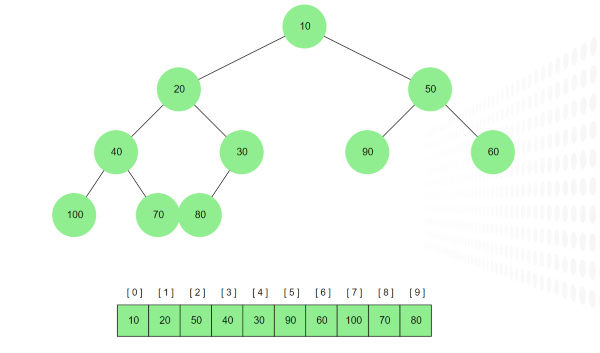

**Heap (Heapify):**
  - **10, 20, 40, 30, 60, 50, 80, 100, 70, 90**

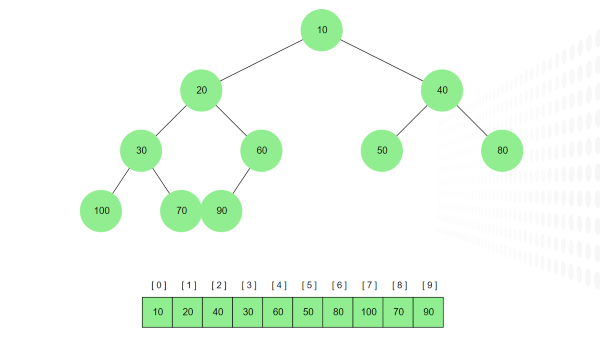

# PriorityQueue Walkthrough 🌿

#### Initialization
- `__init__(self)`: Initialize an empty heap list.

#### Enqueue Method
- `enqueue(self, priority, item)`:
  - Append `(priority, item)` to heap.
  - Call `_heapify_up(last index)`.

#### Dequeue Method
- `dequeue(self)`:
  - Return `None` if heap is empty.
  - Swap root with last element.
  - Remove last element and store it.
  - Call `_heapify_down(0)`.
  - Return stored element `(priority, item)`.

#### Is Empty Method
- `is_empty(self)`:
  - Return `True` if heap is empty, else `False`.

#### Heapify Up Method
- `_heapify_up(self, index)`:
  - Calculate parent index.
  - If index > 0 and heap[index][0] < heap[parent index][0]:
    - Swap index and parent index.
    - Call `_heapify_up(parent index)`.

#### Heapify Down Method
- `_heapify_down(self, index)`:
  - Calculate left and right child indices.
  - Set smallest to index.
  - If left child exists and heap[left][0] < heap[smallest][0], set smallest to left.
  - If right child exists and heap[right][0] < heap[smallest][0], set smallest to right.
  - If smallest is not index:
    - Swap index and smallest.
    - Call `_heapify_down(smallest)`.

#### Swap Method
- `_swap(self, i, j)`:
  - Swap heap[i] and heap[j].

#### Print Heap Method
- `print_heap(self)`:
  - Print heap as a list of `(priority, item)` tuples.

#### Test
- Create `PriorityQueue` instance.
- Enqueue several items with different priorities.
- Print the priority queue.
- Perform dequeue operations and print the results.
- Print the priority queue after dequeues.

In [11]:
class PriorityQueue:
  def __init__(self):
    self.heap = []

  def enqueue(self, priority, item):
    # add new element as a tuple (priority, item)
    self.heap.append((priority, item))
    # fix heap property (bottom to top)
    self._heapify_up(len(self.heap) - 1)

  def dequeue(self):
    if self.is_empty():
      return None
    # swap root with last element and remove last element
    self._swap(0, len(self.heap) - 1)
    priority_item = self.heap.pop()
    # fix heap property (top to bottom)
    self._heapify_down(0)
    return priority_item[1]

  def is_empty(self):
    # return true if heap is empty, else false
    return len(self.heap) == 0

  def _heapify_up(self, index):
    parent_index = (index - 1) // 2
    if index > 0 and self.heap[index][0] < self.heap[parent_index][0]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    smallest = index
    left = 2 * index + 1
    right = 2 * index + 2
    if left < len(self.heap) and self.heap[left][0] < self.heap[smallest][0]:
      smallest = left
    if right < len(self.heap) and self.heap[right][0] < self.heap[smallest][0]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def print_heap(self):
    # print heap in list format
    print(", ".join([f"({p}, {i})" for p, i in self.heap]))


# test
pq = PriorityQueue()
pq.enqueue(3, 'task3')
pq.enqueue(1, 'task1')
pq.enqueue(2, 'task2')
pq.enqueue(5, 'task5')
pq.enqueue(4, 'task4')

print("Priority queue:")
pq.print_heap()

print("Dequeue operations:")
print(pq.dequeue())
print(pq.dequeue())

print("Priority queue after dequeues:")
pq.print_heap()

Priority queue:
(1, task1), (3, task3), (2, task2), (5, task5), (4, task4)
Dequeue operations:
task1
task2
Priority queue after dequeues:
(3, task3), (5, task5), (4, task4)


# Dijkstra's Algorithm [using PriorityQueue]

In [12]:
def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  # process the queue until it's empty
  while not pq.is_empty():
    current_vertex = pq.dequeue()
    visited[current_vertex] = True

    # update distances to neighbors
    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)

  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

True

In [13]:
adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A') == {'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6}

True

# Heapsort [MaxHeap] Walkthrough 🌿

#### Initialization
- `__init__(self, H, method='one_by_one')`: Initialize empty heap list. Build heap using specified method.

#### Insert Method
- `insert(self, value)`:
  - Append value to heap.
  - Call `_heapify_up(last index)`.

#### Delete Method
- `delete(self)`:
  - Return `None` if heap is empty.
  - Swap root with last element.
  - Remove last element and store it.
  - Call `_heapify_down(0)`.
  - Return stored element.

#### Is Empty Method
- `is_empty(self)`:
  - Return `True` if heap is empty, else `False`.

#### Build Heap One-by-One Method
- `_build_heap_one_by_one(self, H)`:
  - Insert each value in H.

#### Build Heap Using Heapify Method
- `_build_heap_heapify(self, H)`:
  - Set heap to H.
  - Call `_heapify_down` for each non-leaf node from bottom to top.

#### Heapify Up Method
- `_heapify_up(self, index)`:
  - Calculate parent index.
  - If index > 0 and heap[index] > heap[parent index]:
    - Swap index and parent index.
    - Call `_heapify_up(parent index)`.

#### Heapify Down Method
- `_heapify_down(self, index)`:
  - Calculate left and right child indices.
  - Set largest to index.
  - If left child exists and heap[left] > heap[largest], set largest to left.
  - If right child exists and heap[right] > heap[largest], set largest to right.
  - If largest is not index:
    - Swap index and largest.
    - Call `_heapify_down(largest)`.

#### Swap Method
- `_swap(self, i, j)`:
  - Swap heap[i] and heap[j].

#### Print Heap Method
- `print_heap(self)`:
  - Print heap as a space-separated list.

#### **Heapsort Method** ☢️
- `heapsort(self)`:
  - Create a copy of the heap.
  - Initialize an empty sorted list.
  - While heap is not empty:
    - Delete the max element and add it to the sorted list.
  - Restore the original heap.
  - Return the sorted list.

In [16]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise ValueError("Invalid method. Choose 'one_by_one' or 'heapify'.")

  def insert(self, value):
    # add value to the end
    self.heap.append(value)
    # fix heap property (bottom to top)
    self._heapify_up(len(self.heap) - 1)

  def delete(self):
    if self.is_empty():
      return None
    # swap root with last element and remove last element
    self._swap(0, len(self.heap) - 1)
    root = self.heap.pop()
    # fix heap property (top to bottom)
    self._heapify_down(0)
    return root

  def is_empty(self):
    # return true if heap is empty, else false
    return len(self.heap) == 0

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    # build heap property (top to bottom)
    for i in range(len(H) // 2 - 1, -1, -1):
      self._heapify_down(i)

  def _heapify_up(self, index):
    parent_index = (index - 1) // 2
    if index > 0 and self.heap[index] > self.heap[parent_index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    largest = index
    left = 2 * index + 1
    right = 2 * index + 2
    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right
    if largest != index:
      self._swap(index, largest)
      self._heapify_down(largest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def print_heap(self):
    # print heap in space-separated format
    print(" ".join(map(str, self.heap)))

  def heapsort(self):
    # create a copy of the heap
    temp_heap = self.heap[:]
    sorted_list = []
    while not self.is_empty():
      # delete the max element and add it to the sorted list
      sorted_list.append(self.delete())
    # restore the original heap
    self.heap = temp_heap
    return sorted_list


# test
H = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# construct heap using one-by-one method
max_heap = MaxHeap(H, method='one_by_one')
print("Heap (One-by-One):")
max_heap.print_heap()

# perform heapsort
sorted_list = max_heap.heapsort()
print("Sorted List (Heapsort):")
print(" ".join(map(str, sorted_list)))

Heap (One-by-One):
100 90 60 70 80 20 50 10 40 30
Sorted List (Heapsort):
100 90 80 70 60 50 40 30 20 10
